### 1. Gradient Descent

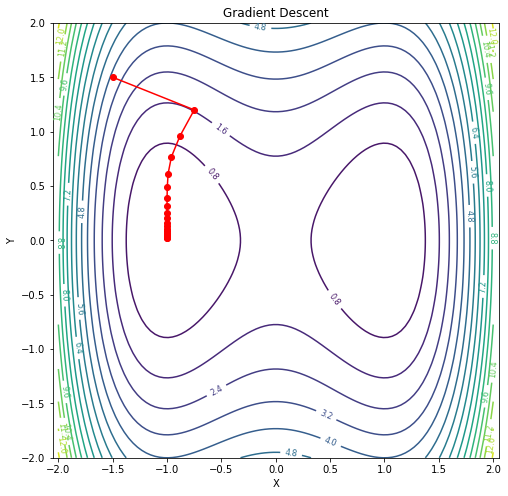

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return  (x**2 - 1)**2 + y**2

def grad_f(x, y):
    df_dx = 4 * x * (x**2 - 1)
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

def gradient(x0, eta, n_iter):
    points = [x0]
    values = [f(*x0)]

    x = x0
    for i in range(n_iter):
        x = x - eta * grad_f(*x)
        points.append(x)
        values.append(f(*x))

    return np.array(points), np.array(values)

if __name__ == '__main__':
    
    x0 = np.array([-1.5, 1.5])
    eta = 0.1
    n_iter = 20

    points, values = gradient(x0, eta, n_iter)

    xx, yy = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(xx, yy)
    Z = f(X, Y)

    fig, ax = plt.subplots(figsize=(8, 8))
    cs = ax.contour(X, Y, Z, cmap='viridis', levels=20)
    ax.clabel(cs, inline=True, fontsize=8)

    ax.plot(points[:, 0], points[:, 1], color='r', marker='o')
    ax.set_title('Gradient Descent')
    ax.set_xlabel('X')
    ax.set_ylabel('Y') 
    ax.axis('equal')
    plt.show()

### 2. Stochastic Gradient Descent

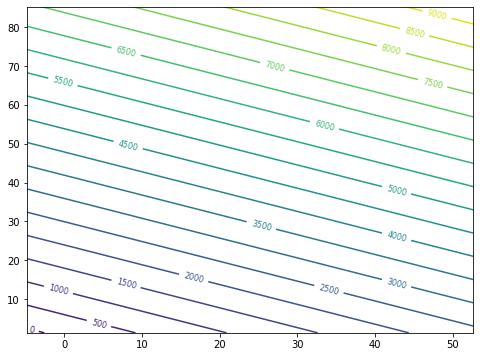

In [56]:
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd

np.random.seed(44)

X, y = make_regression(n_samples=100, n_features=2, noise=0.5, random_state=44)
y = y.reshape(-1, 1)

n_epochs = 50
t0, t1 = 5, 50
m = X.shape[0]

theta = np.random.randn(2, 1)
thetas = [theta]

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient
        thetas.append(theta)


theta_min0 = min(theta[0] for theta in thetas)
theta_max0 = max(theta[0] for theta in thetas)
theta_min1 = min(theta[1] for theta in thetas)
theta_max1 = max(theta[1] for theta in thetas)

theta_min0, theta_min1, theta_max0, theta_max1

xx, yy = np.meshgrid(np.linspace(theta_min0, theta_max0, 100), np.linspace(theta_min1, theta_max1, 100))
zz = theta[0] * xx + theta[1] * yy

fig, ax = plt.subplots(figsize=(8, 6))
cs = ax.contour(xx, yy, zz, cmap='viridis', levels=20)
ax.clabel(cs, inline=True, fontsize=8)

plt.show()

In [11]:
import numpy as np
from sklearn.datasets import make_regression

np.random.seed(44)

X, y = make_regression(n_samples=100, n_features=2, noise=0.5, random_state=44)
y = y.reshape(-1, 1)

n_iter = 50
learning_rate = 1e-3
m = X.shape[0]

eta = 0.1
theta = np.random.randn(2, 1)

for i in range(n_iter):
    gradient = (2/m) * X.T.dot(X.dot(theta) - y)
    theta = theta - eta * gradient



(2, 1)

theta_min0, theta_min1, theta_max0, theta_max1:
-4.830530736461307 1.3163573247118194 52.62986128089866 85.30526814961136


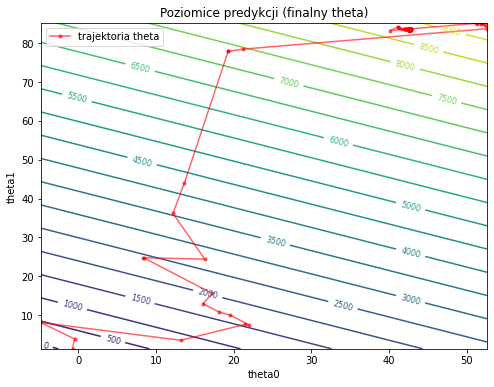

In [49]:
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(44)

# dane
X, y = make_regression(n_samples=100, n_features=2, noise=0.5, random_state=44)
y = y.reshape(-1, 1)   # (100,1) - ważne, aby mieć wektor-kolumnę

# hiperparametry
n_epochs = 50
t0, t1 = 5, 50
m = X.shape[0]

# inicjalizacja parametrow (2 cechy -> theta ma shape (2,1))
theta = np.random.randn(2, 1)
thetas = [theta.copy()]   # przechowujemy kopię initial theta

def learning_schedule(t):
    return t0 / (t + t1)

# SGD (po jednym przykładzie)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index: random_index + 1]        # shape (1,2)
        yi = y[random_index: random_index + 1].reshape(1, 1)  # shape (1,1)
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)   # shape (2,1)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient
        thetas.append(theta.copy())  # przechowuj kopię, nie referencję

# obliczenia min/max używając elementu scalara theta[0,0], theta[1,0]
theta_min0 = min(t[0,0] for t in thetas)
theta_max0 = max(t[0,0] for t in thetas)
theta_min1 = min(t[1,0] for t in thetas)
theta_max1 = max(t[1,0] for t in thetas)

print("theta_min0, theta_min1, theta_max0, theta_max1:")
print(theta_min0, theta_min1, theta_max0, theta_max1)

# przygotowanie siatki i 'powierzchni' liniowego modelu (używamy finalnego theta)
xx, yy = np.meshgrid(np.linspace(theta_min0, theta_max0, 100),
                     np.linspace(theta_min1, theta_max1, 100))

# finalne theta (skalary)
th0 = float(theta[0,0])
th1 = float(theta[1,0])

zz = th0 * xx + th1 * yy   # wartości predykcji modelu linearnego na siatce

# rysowanie poziomic
fig, ax = plt.subplots(figsize=(8, 6))
cs = ax.contour(xx, yy, zz, levels=20, cmap='viridis')
ax.clabel(cs, inline=True, fontsize=8)
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_title("Poziomice predykcji (finalny theta)")

# opcjonalnie: wykres ścieżki theta w przestrzeni (punkty)
thetas_arr = np.array(thetas).reshape(len(thetas), 2)  # shape (len(thetas), 2)
ax.plot(thetas_arr[:,0], thetas_arr[:,1], marker='o', markersize=3, linestyle='-', color='red', alpha=0.6, label='trajektoria theta')
ax.legend()
plt.show()
